In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [216]:
date = {
    "Alina": [60, 165, True],
    "Bogdan": [72, 183, False],
    "Ciprian": [69, 178, False],
    "Diana": [55, 152, True],
    "Elena": [58, 168, True],
    "Andrei": [80, 185, False],
    "Mihai": [75, 177, False],
    "Irina": [62, 170, True],
    "Florin": [90, 190, False],
    "Maria": [53, 160, True],
    "Vlad": [70, 175, False],
    "Ioana": [50, 155, True],
    "Radu": [68, 172, False],
    "Ana": [59, 162, True],
    "George": [85, 182, False],
    "Larisa": [61, 167, True],
    "Stefan": [78, 180, False],
    "Bianca": [56, 158, True],
    "Paul": [74, 176, False],
    "Oana": [54, 163, True],
    "Cosmin": [82, 188, False],
    "Teodora": [57, 159, True],
    "Ionut": [76, 181, False],
    "Gabriela": [60, 164, True]
}

In [217]:
pd.DataFrame(date)

,Alina,Bogdan,Ciprian,Diana,Elena,Andrei,Mihai,Irina,Florin,Maria,...,George,Larisa,Stefan,Bianca,Paul,Oana,Cosmin,Teodora,Ionut,Gabriela
0,60,72,69,55,58,80,75,62,90,53,...,85,61,78,56,74,54,82,57,76,60
1,165,183,178,152,168,185,177,170,190,160,...,182,167,180,158,176,163,188,159,181,164
2,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,False,True,False,True


In [218]:
df = pd.DataFrame(date.values(), columns=["Greutate", "Inaltime", "Voce_Subtire"])
df

,Greutate,Inaltime,Voce_Subtire
0,60,165,True
1,72,183,False
2,69,178,False
3,55,152,True
4,58,168,True
5,80,185,False
6,75,177,False
7,62,170,True
8,90,190,False
9,53,160,True


In [219]:
df["Voce_Subtire"] = df["Voce_Subtire"].astype(int)
df

,Greutate,Inaltime,Voce_Subtire
0,60,165,1
1,72,183,0
2,69,178,0
3,55,152,1
4,58,168,1
5,80,185,0
6,75,177,0
7,62,170,1
8,90,190,0
9,53,160,1


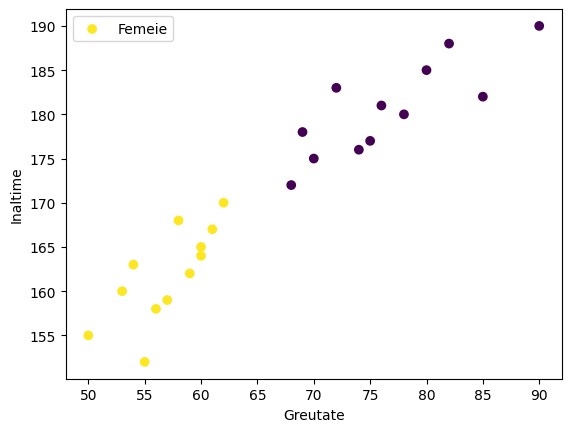

In [220]:
plt.scatter(df["Greutate"], df["Inaltime"], c=df["Voce_Subtire"])
plt.xlabel("Greutate")
plt.ylabel("Inaltime")
plt.legend(["Femeie", "Barbat"])

In [221]:
model= tf.keras.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])


In [222]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [223]:
df.shape

(24, 3)

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_train, x_test, y_train, y_test = train_test_split(df, df[["Voce_Subtire"]], test_size=0.15)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 3), (4, 3), (20, 1), (4, 1))

In [226]:
y_train

,Voce_Subtire
20,0
3,1
22,0
6,0
13,1
4,1
9,1
17,1
16,0
7,1


In [227]:
type(y_train)

pandas.core.frame.DataFrame

In [228]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4375 - loss: 15.9546 - val_accuracy: 0.7500 - val_loss: 5.1427
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4375 - loss: 12.8031 - val_accuracy: 0.7500 - val_loss: 3.8371
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4375 - loss: 9.6611 - val_accuracy: 0.7500 - val_loss: 2.5353
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4375 - loss: 6.5287 - val_accuracy: 0.7500 - val_loss: 1.2395
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4375 - loss: 3.4071 - val_accuracy: 1.0000 - val_loss: 0.2362
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.6134 - val_accuracy: 0.2500 - val_loss: 2.7086
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5625 - loss: 1.7344 - val_accuracy: 0.2500 - val_loss: 5.4625
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5625 - loss: 3.3803 - val_accuracy: 0.2500 - val_loss:

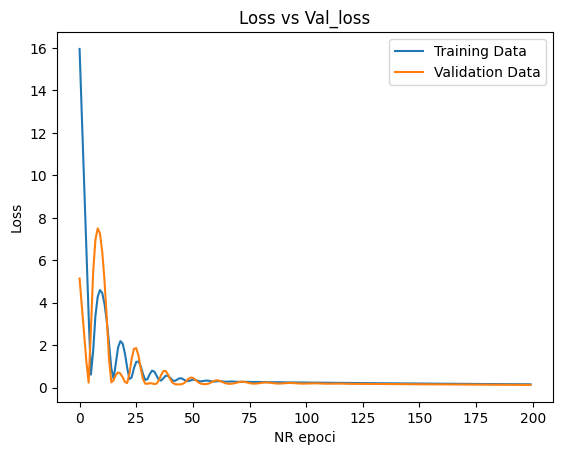

In [234]:
loss = history.history['loss']
plt.plot(loss)

val_loss = history.history['val_loss']
plt.plot(val_loss)

plt.title("Loss vs Val_loss")


plt.xlabel("NR epoci")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"])

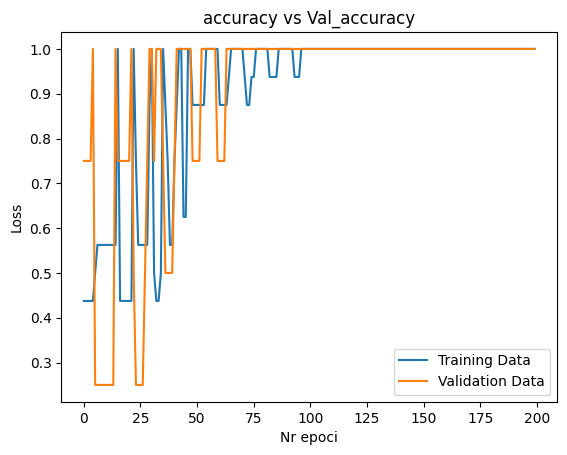

In [235]:
accuracy = history.history['accuracy']
plt.plot(accuracy)

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy)

plt.title("accuracy vs Val_accuracy")


plt.xlabel("Nr epoci")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"])

In [231]:
x_test

,Greutate,Inaltime,Voce_Subtire
10,70,175,0
19,54,163,1
8,90,190,0
21,57,159,1


In [232]:
x_test.iloc[0]

,10
Greutate,70
Inaltime,175
Voce_Subtire,0


In [233]:
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


array([[0.25887242],
       [0.9706452 ],
       [0.00250859],
       [0.87475085]], dtype=float32)